In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Example

In [2]:
# Downloading NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = "This is a sample sentence, demonstrating the removal of stopwords and punctuation!"

# Tokenization
tokens = word_tokenize(text)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
for word in additional_stops:
    stop_words.add(word)
    
tokens = [word for word in tokens if not word in stop_words]

# Rejoin tokens into a string
cleaned_text = ' '.join(tokens)

print(cleaned_text)

sample sentence demonstrating removal stopwords punctuation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel('../0_data/autogen_captions.xlsx')
df.head()

Long  \
0  2015-11-18_18-26-59_UTC.jpg   
1  2015-06-01_07-45-08_UTC.jpg   
2  2015-07-06_10-38-30_UTC.jpg   
3  2020-04-10_08-57-20_UTC.jpg   
4  2019-10-24_11-49-40_UTC.jpg   

                                        Auto_caption  
0  a picture of a woman with long black hair sits...  
1  a picture of a woman with black hair and a bla...  
2  a picture of a woman with black hair and a bla...  
3  a picture of a woman wearing a black jacket an...  
4  a picture of a woman in a red dress sits on a ...

## Clean data

In [4]:
clean_text = []
for row in df['Auto_caption']:
    text = row
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
    for word in additional_stops:
        stop_words.add(word)
    tokens = [word for word in tokens if not word in stop_words]
    
    # Rejoin tokens into a string
    cleaned_text = ' '.join(tokens)
    clean_text.append(cleaned_text)

In [5]:
df['clean_text'] = clean_text

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# Assuming df is your DataFrame and 'text_column' is the column with text
text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = None,
                      min_font_size = 10).generate(text)

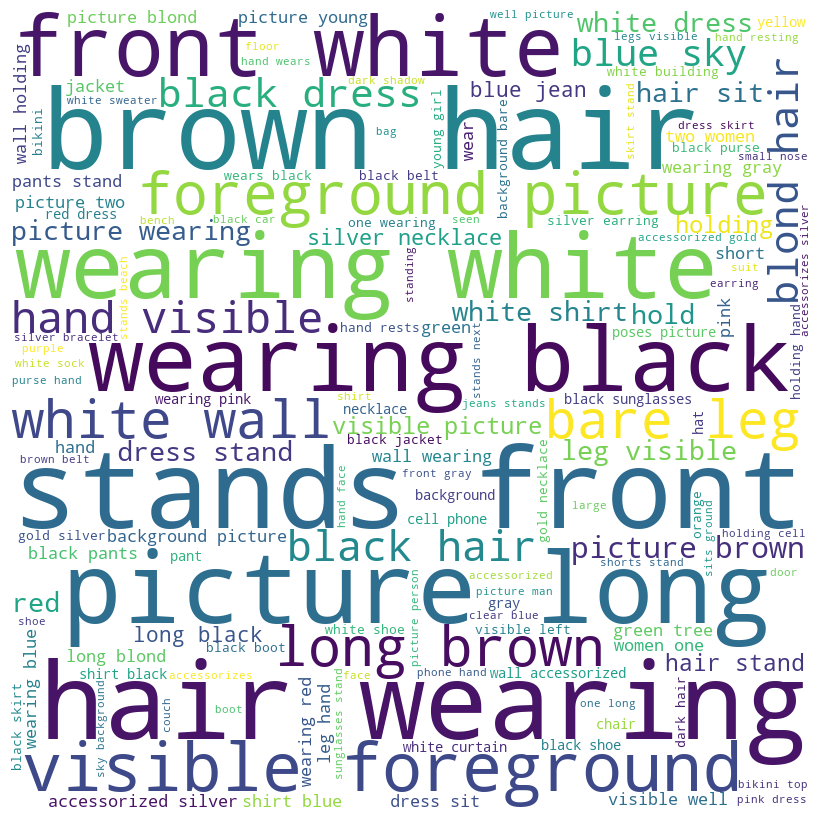

In [8]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


white 718
black 711
wearing 594
hair 526
brown 428
stands 393
hand 346
front 319
visible 313
dress 270


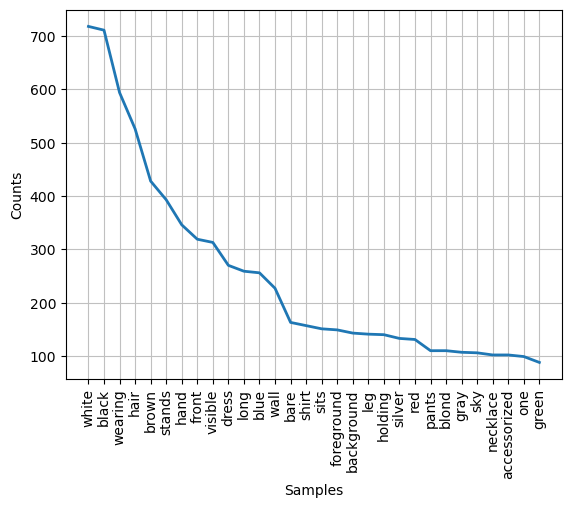

In [10]:
from nltk.probability import FreqDist


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = ' '.join(df['clean_text'])

# Tokenization
tokens = word_tokenize(text)

# Optional: Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
additional_stops = ['arafed', 'araffed', 'araffe', 'woman', 'picture']
for word in additional_stops:
    stop_words.add(word)
tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Frequency distribution
freq_dist = FreqDist(tokens)

# Display most common words
for word, frequency in freq_dist.most_common(10):
    print(word, frequency)

# Plot frequency distribution
freq_dist.plot(30, cumulative=False)
plt.show()

### Processing POS

In [11]:
%run ../labs/cleaning_mod.py

In [13]:
# superficial cleaning
df['text_sup_clean'] = df['Auto_caption'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean'] = df['text_sup_clean'].apply(deep_cleaning)
df['text_deep_clean_pos'] = df['text_sup_clean'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags'] = df['Auto_caption'].apply(get_hashtags)

# display the result
display(df)

C:\Users\danie\Documents\GitHub\network_science\labs\cleaning_mod.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


Long  \
0      2015-11-18_18-26-59_UTC.jpg   
1      2015-06-01_07-45-08_UTC.jpg   
2      2015-07-06_10-38-30_UTC.jpg   
3      2020-04-10_08-57-20_UTC.jpg   
4      2019-10-24_11-49-40_UTC.jpg   
..                             ...   
759  2023-11-08_17-37-17_UTC_4.jpg   
760  2023-11-08_17-37-17_UTC_5.jpg   
761    2013-10-08_12-40-36_UTC.jpg   
762    2014-03-21_10-14-52_UTC.jpg   
763    2014-04-12_09-13-03_UTC.jpg   

                                          Auto_caption  \
0    a picture of a woman with long black hair sits...   
1    a picture of a woman with black hair and a bla...   
2    a picture of a woman with black hair and a bla...   
3    a picture of a woman wearing a black jacket an...   
4    a picture of a woman in a red dress sits on a ...   
..                                                 ...   
759  a picture of a woman in a black coat and sungl...   
760  a picture of a woman with brown hair wearing a...   
761  a picture of a woman with black hair and a bar...   
762  a picture of a young woman with long brown hai...   
763  a picture of a group of beautiful women, dress...   

                                            clean_text  \
0    picture long black hair sits couch front black...   
1    picture black hair black tattoo arm wears whit...   
2    picture black hair black tattoo arm poses whit...   
3    picture wearing black jacket heels sits red co...   
4    picture red dress sits leather couch holding c...   
..                                                 ...   
759  picture black coat sunglasses walks sidewalk l...   
760  picture brown hair wearing black coat walks pa...   
761  picture black hair bare leg featured cover mag...   
762  picture young long brown hair wearing white la...   
763  picture group beautiful women dressed white pu...   

                                        text_sup_clean  \
0    a picture of a woman with long black hair sits...   
1    a picture of a woman with black hair and a bla...   
2    a picture of a woman with black hair and a bla...   
3    a picture of a woman wearing a black jacket an...   
4    a picture of a woman in a red dress sits on a ...   
..                                                 ...   
759  a picture of a woman in a black coat and sungl...   
760  a picture of a woman with brown hair wearing a...   
761  a picture of a woman with black hair and a bar...   
762  a picture of a young woman with long brown hai...   
763  a picture of a group of beautiful women dresse...   

                                       text_deep_clean  \
0    picture woman long black hair sit couch front ...   
1    picture woman black hair black tattoo arm wear...   
2    picture woman black hair black tattoo arm pose...   
3    picture woman wear black jacket heel sit red c...   
4    picture woman red dress sit leather couch hold...   
..                                                 ...   
759  picture woman black coat sunglass walk sidewal...   
760  picture woman brown hair wear black coat walk ...   
761  picture woman black hair bare leg feature cove...   
762  picture young woman long brown hair wear white...   
763  picture group beautiful woman dress white purp...   

                                   text_deep_clean_pos hashtags  
0    [picture NOUN, woman NOUN, long ADJ, black ADJ...       []  
1    [picture NOUN, woman NOUN, black ADJ, hair NOU...       []  
2    [picture NOUN, woman NOUN, black ADJ, hair NOU...       []  
3    [picture NOUN, woman NOUN, wear VERB, black AD...       []  
4    [picture NOUN, woman NOUN, red ADJ, dress NOUN...       []  
..                                                 ...      ...  
759  [picture NOUN, woman NOUN, black ADJ, coat NOU...       []  
760  [picture NOUN, woman NOUN, brown ADJ, hair NOU...       []  
761  [picture NOUN, woman NOUN, black ADJ, hair NOU...       []  
762  [picture NOUN, young ADJ, woman NOUN, long ADJ...       []  
763  [picture NOUN, group NOUN, beautiful ADJ, woma...     

### Get Text Only after cleaning

In [27]:
custom_stops = ['arafed', 'araffed', 'araffe', 'woman', 'picture']
all_words_joined = []

for cell in df['text_deep_clean_pos']:
    list_of_strings = list(cell)
    # Iterate over the list, split each string, and keep the first word
    words_afters_pos_tagging = [s.split()[0] for s in list_of_strings]
    
    # Join the first words into a single string
    single_words_pos_tagging = ' '.join(words_afters_pos_tagging)
    for string in custom_stops:
        single_words_pos_tagging = single_words_pos_tagging.replace(string, '')
   
    all_words_joined.append(single_words_pos_tagging)
df['text_deep_clean_pos_str'] = all_words_joined
df.head()

Long  \
0  2015-11-18_18-26-59_UTC.jpg   
1  2015-06-01_07-45-08_UTC.jpg   
2  2015-07-06_10-38-30_UTC.jpg   
3  2020-04-10_08-57-20_UTC.jpg   
4  2019-10-24_11-49-40_UTC.jpg   

                                        Auto_caption  \
0  a picture of a woman with long black hair sits...   
1  a picture of a woman with black hair and a bla...   
2  a picture of a woman with black hair and a bla...   
3  a picture of a woman wearing a black jacket an...   
4  a picture of a woman in a red dress sits on a ...   

                                          clean_text  \
0  picture long black hair sits couch front black...   
1  picture black hair black tattoo arm wears whit...   
2  picture black hair black tattoo arm poses whit...   
3  picture wearing black jacket heels sits red co...   
4  picture red dress sits leather couch holding c...   

                                      text_sup_clean  \
0  a picture of a woman with long black hair sits...   
1  a picture of a woman with black hair and a bla...   
2  a picture of a woman with black hair and a bla...   
3  a picture of a woman wearing a black jacket an...   
4  a picture of a woman in a red dress sits on a ...   

                                     text_deep_clean  \
0  picture woman long black hair sit couch front ...   
1  picture woman black hair black tattoo arm wear...   
2  picture woman black hair black tattoo arm pose...   
3  picture woman wear black jacket heel sit red c...   
4  picture woman red dress sit leather couch hold...   

                                 text_deep_clean_pos hashtags  \
0  [picture NOUN, woman NOUN, long ADJ, black ADJ...       []   
1  [picture NOUN, woman NOUN, black ADJ, hair NOU...       []   
2  [picture NOUN, woman NOUN, black ADJ, hair NOU...       []   
3  [picture NOUN, woman NOUN, wear VERB, black AD...       []   
4  [picture NOUN, woman NOUN, red ADJ, dress NOUN...       []   

                             text_deep_clean_pos_str  
0    long black hair sit couch front black firepl...  
1    black hair black tattoo arm wear white dress...  
2    black hair black tattoo arm pose white dress...  
3    wear black jacket heel sit red couch bare le...  
4    red dress sit leather couch hold cell phone ...

### Save

In [29]:
df.to_excel('../0_data/autogenerated_clean.xlsx', index = False)